# Получение данных из train.csv

In [88]:
import math
import random
import os
import json
import statistics

import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import seaborn as sns
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

In [3]:
df = pd.read_csv('train.csv', sep=',', low_memory=False)

## Преобразование данных

In [58]:
group_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']
# fullvisitorId - должно быть только string, так как при чтении в float может округлиться
df = pd.read_csv('train.csv', 
                     converters={col: json.loads for col in group_columns}, 
                     dtype={'fullVisitorId': 'str'}, low_memory=False)
# Берем случайные 10% выборки
df = df.sample(frac=0.1).reset_index(drop=True)
    
for col in group_columns:
    # Нормализация каждого сгруппированного столбца
    normalizedColumn = pd.json_normalize(df[col])
    # Именование каждого столбца
    normalizedColumn.columns = [f"{col}.{parameter}" for parameter in normalizedColumn.columns]
    # Удаление сгрупиированного столбца и добавление новых столбцов к DF
    df = df.drop(col, axis=1)#.merge(normalizedColumn, right_index=True, left_index=True)
    df = df.merge(normalizedColumn, right_index=True, left_index=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   channelGrouping                                    90365 non-null  object
 1   date                                               90365 non-null  int64 
 2   fullVisitorId                                      90365 non-null  object
 3   sessionId                                          90365 non-null  object
 4   socialEngagementType                               90365 non-null  object
 5   visitId                                            90365 non-null  int64 
 6   visitNumber                                        90365 non-null  int64 
 7   visitStartTime                                     90365 non-null  int64 
 8   device.browser                                     90365 non-null  object
 9   device.browserVer

### Transaction -> float (похоже, можно было и в int)

In [240]:
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    90365 non-null  object 
 1   date                                               90365 non-null  int64  
 2   fullVisitorId                                      90365 non-null  object 
 3   sessionId                                          90365 non-null  object 
 4   socialEngagementType                               90365 non-null  object 
 5   visitId                                            90365 non-null  int64  
 6   visitNumber                                        90365 non-null  int64  
 7   visitStartTime                                     90365 non-null  int64  
 8   device.browser                                     90365 non-null  object 
 9   device

### Удаление ненужных столбцов: либо недоступных, либо тех которые описывают информацию, уже описывающуюся другими столбцами

In [242]:
df = df.drop('sessionId', 1)

In [243]:
df = df.drop('visitId', 1)

In [244]:
df = df.drop('visitStartTime', 1)

In [245]:
df = df.drop('device.browserVersion', 1)

In [246]:
df = df.drop('device.browserSize', 1)

In [247]:
df = df.drop('device.operatingSystemVersion', 1)

In [248]:
df = df.drop('device.mobileDeviceBranding', 1)

In [249]:
df = df.drop('device.mobileDeviceModel', 1)

In [250]:
df = df.drop('device.mobileInputSelector', 1)

In [251]:
df = df.drop('device.mobileDeviceInfo', 1)

In [252]:
df = df.drop('device.mobileDeviceMarketingName', 1)

In [253]:
df = df.drop('device.flashVersion', 1)

In [254]:
df = df.drop('device.language', 1)

In [255]:
df = df.drop('device.screenColors', 1)

In [256]:
df = df.drop('device.screenResolution', 1)

In [257]:
df = df.drop('geoNetwork.country', 1)

In [258]:
df = df.drop('geoNetwork.region', 1)

In [259]:
df = df.drop('geoNetwork.metro', 1)

In [260]:
df = df.drop('geoNetwork.city', 1)

In [261]:
df = df.drop('geoNetwork.cityId', 1)

In [262]:
df = df.drop('geoNetwork.latitude', 1)

In [263]:
df = df.drop('geoNetwork.longitude', 1)

In [264]:
df = df.drop('geoNetwork.networkLocation', 1)

In [265]:
df = df.drop('totals.visits', 1)

In [266]:
df = df.drop('trafficSource.referralPath', 1)

In [267]:
df = df.drop('trafficSource.adwordsClickInfo.criteriaParameters', 1)

In [268]:
#df = df.drop('trafficSource.campaignCode', 1)

In [269]:
df = df.drop('geoNetwork.subContinent', 1)

In [270]:
df = df.drop('geoNetwork.networkDomain', 1)

In [271]:
df = df.drop('trafficSource.campaign', 1)

In [272]:
df = df.drop('trafficSource.medium', 1)

In [273]:
df = df.drop('trafficSource.keyword', 1)

In [274]:
df = df.drop('trafficSource.isTrueDirect', 1)

In [275]:
df = df.drop('trafficSource.adwordsClickInfo.page', 1)

In [276]:
df = df.drop('trafficSource.adwordsClickInfo.slot', 1)

In [277]:
df = df.drop('trafficSource.adwordsClickInfo.gclId', 1)

In [278]:
df = df.drop('trafficSource.adwordsClickInfo.isVideoAd', 1)

In [279]:
df = df.drop('trafficSource.adContent', 1)

In [280]:
df = df.drop('device.isMobile', 1)

In [281]:
df = df.drop('trafficSource.source', 1)

In [282]:
df = df.drop('socialEngagementType', 1)

In [283]:
df.iloc[0]

channelGrouping                                             Display
date                                                       20170108
fullVisitorId                                   5082310728519609149
visitNumber                                                       8
device.browser                                               Safari
device.operatingSystem                                          iOS
device.deviceCategory                                        mobile
geoNetwork.continent                                       Americas
totals.hits                                                      10
totals.pageviews                                                 10
totals.bounces                                                  NaN
totals.newVisits                                                NaN
totals.transactionRevenue                                       NaN
trafficSource.adwordsClickInfo.adNetworkType                    NaN
Name: 0, dtype: object

### date -> Datetime - приводим параметр в строку, строку разбиваем на YYYYMMDD, по которым создаем datetime

In [284]:
from datetime import datetime, timedelta
for i in range(len(df['date'])):
    dateString = str(df.loc[i, 'date'])
    df.loc[i, 'date'] = datetime(year=int(dateString[0:4]), month=int(dateString[4:6]), day=int(dateString[6:8]))
df['date'] = pd.to_datetime(df['date'])

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  object        
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.browser                                90365 non-null  object        
 5   device.operatingSystem                        90365 non-null  object        
 6   device.deviceCategory                         90365 non-null  object        
 7   geoNetwork.continent                          90365 non-null  object        
 8   totals.hits                                   90365 non-null  obje

### channelGrouping -> float в зависимости от транзакций для каждого типа
### используется аналог "счетчика" для обработки категориальных признаков для задач классификации
### Для каждой группы считается логарифм от суммы транзакций, после чего это число
### для каждой группы делится на количество элементов в группе

In [287]:
df['totals.transactionRevenue'].value_counts()

1.699000e+07    26
4.479000e+07    20
1.899000e+07    19
3.359000e+07    17
1.359000e+07    16
                ..
1.509750e+09     1
3.103100e+08     1
7.756000e+07     1
5.114000e+07     1
1.678000e+07     1
Name: totals.transactionRevenue, Length: 825, dtype: int64

In [288]:
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].fillna(0)

In [289]:
df_channel = df.groupby(df['channelGrouping'])

In [290]:
df_channel2 = df_channel.apply(lambda x: math.log(sum(x['totals.transactionRevenue'])+1))

In [292]:
df_channel = df_channel.apply(lambda x: len(x))

In [293]:
df_channel

channelGrouping
(Other)              14
Affiliates         1659
Direct            14420
Display             610
Organic Search    38015
Paid Search        2551
Referral          10448
Social            22648
dtype: int64

In [294]:
df_channel2

channelGrouping
(Other)            0.000000
Affiliates        15.891195
Direct            24.407183
Display           21.746838
Organic Search    24.315336
Paid Search       22.163805
Referral          24.928908
Social            20.034748
dtype: float64

In [296]:
channelGrouping = {
    '(Other)' : df_channel2['(Other)'] / df_channel['(Other)'],
    'Affiliates' : df_channel2['Affiliates'] / df_channel['Affiliates'],
    'Direct' : df_channel2['Direct'] / df_channel['Direct'],
    'Display' : df_channel2['Display'] / df_channel['Display'],
    'Organic Search' : df_channel2['Organic Search'] / df_channel['Organic Search'],
    'Paid Search' : df_channel2['Paid Search'] / df_channel['Paid Search'],
    'Referral' : df_channel2['Referral'] / df_channel['Referral'],
    'Social' : df_channel2['Social'] / df_channel['Social']
}

In [297]:
channelGrouping

{'(Other)': 0.0,
 'Affiliates': 0.009578779491402595,
 'Direct': 0.0016925924235791933,
 'Display': 0.03565055481615784,
 'Organic Search': 0.0006396247839911173,
 'Paid Search': 0.008688280873835849,
 'Referral': 0.002385998129089204,
 'Social': 0.0008846144439580046}

In [298]:
df['channelGrouping'] = df['channelGrouping'].replace(channelGrouping)

In [299]:
df['channelGrouping'].value_counts()

0.000640    38015
0.000885    22648
0.001693    14420
0.002386    10448
0.008688     2551
0.009579     1659
0.035651      610
0.000000       14
Name: channelGrouping, dtype: int64

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.browser                                90365 non-null  object        
 5   device.operatingSystem                        90365 non-null  object        
 6   device.deviceCategory                         90365 non-null  object        
 7   geoNetwork.continent                          90365 non-null  object        
 8   totals.hits                                   90365 non-null  obje

### Browser -> dummy variables - создание столбцов со значениями (0/1) для самых популярных браузеров

In [303]:
df['browser.Chrome'] = df['device.browser'] == 'Chrome'
df['browser.Safari'] = df['device.browser'] == 'Safari'
df['browser.Firefox'] = df['device.browser'] == 'Firefox'
df['browser.IE'] = df['device.browser'] == 'Internet Explorer'
df['browser.Edge'] = df['device.browser'] == 'Edge'
df['browser.Other'] = (df['device.browser'] != 'Chrome') & (df['device.browser'] != 'Firefox') & (
    df['device.browser'] != 'Safari') & (df['device.browser'] != 'Internet Explorer') & (df['device.browser'] != 'Edge')

In [304]:
df = df.drop('device.browser', 1)

### OperatingSystem -> dummy variables - создание столбцов со значениями (0/1) для самых популярных ОС

In [305]:
df['device.operatingSystem'].value_counts()

Windows          34765
Macintosh        25452
Android          12440
iOS              10979
Linux             3460
Chrome OS         2628
(not set)          454
Windows Phone      115
Samsung             23
BlackBerry          23
Nintendo Wii         7
Firefox OS           6
Xbox                 6
Nintendo WiiU        5
Nintendo 3DS         1
FreeBSD              1
Name: device.operatingSystem, dtype: int64

In [306]:
df['OS.Windows'] = df['device.operatingSystem'] == 'Windows'
df['OS.Mac'] = df['device.operatingSystem'] == 'Macintosh'
df['OS.Android'] = df['device.operatingSystem'] == 'Android'
df['OS.IOS'] = df['device.operatingSystem'] == 'iOS'
df['OS.Linux'] = df['device.operatingSystem'] == 'Linux'
df['OS.Other'] = (df['device.operatingSystem'] != 'Windows') & (df['device.operatingSystem'] != 'Macintosh') & (
    df['device.operatingSystem'] != 'Android') & (df['device.operatingSystem'] != 'iOS') & (df['device.operatingSystem'] != 'Linux')

In [307]:
df = df.drop('device.operatingSystem', 1)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  object        
 5   geoNetwork.continent                          90365 non-null  object        
 6   totals.hits                                   90365 non-null  object        
 7   totals.pageviews                              90362 non-null  object        
 8   totals.bounces                                45210 non-null  obje

### DeviceCategory -> category
### Делается предположение, что планшет - что-то среднее между компьютером и смартфоном, из-за чего группировка делается именно так:
### Компьютер - 0
### Планшет - 1
### Смартфон - 2

In [309]:
df['device.deviceCategory'].value_counts()

desktop    66207
mobile     21188
tablet      2970
Name: device.deviceCategory, dtype: int64

In [310]:
deviceCats = {
    'desktop' : 0,
    'tablet' : 1,
    'mobile' : 2
}

In [311]:
df['device.deviceCategory'] = df['device.deviceCategory'].replace(deviceCats)

In [312]:
df['device.deviceCategory'].value_counts()

0    66207
2    21188
1     2970
Name: device.deviceCategory, dtype: int64

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  object        
 6   totals.hits                                   90365 non-null  object        
 7   totals.pageviews                              90362 non-null  object        
 8   totals.bounces                                45210 non-null  obje

### geoNetwork.continent -> float (подобие "счетчика") - описано выше

In [314]:
df['geoNetwork.continent'].value_counts()

Americas     45087
Asia         22482
Europe       19599
Oceania       1568
Africa        1491
(not set)      138
Name: geoNetwork.continent, dtype: int64

In [315]:
df_region = df.groupby(df['geoNetwork.continent'])

In [316]:
df_region2 = df_region.apply(lambda x: math.log(sum(x['totals.transactionRevenue'])+1))

In [317]:
df_region = df_region.apply(lambda x:len(x))

In [318]:
df_region

geoNetwork.continent
(not set)      138
Africa        1491
Americas     45087
Asia         22482
Europe       19599
Oceania       1568
dtype: int64

In [319]:
df_region2

geoNetwork.continent
(not set)     0.000000
Africa       21.307937
Americas     25.707226
Asia         21.643027
Europe       19.124718
Oceania      18.715661
dtype: float64

In [320]:
regionGrouping = {
    '(not set)' : df_region2['(not set)'] / df_region['(not set)'],
    'Africa' : df_region2['Africa'] / df_region['Africa'],
    'Americas' : df_region2['Americas'] / df_region['Americas'],
    'Asia' : df_region2['Asia'] / df_region['Asia'],
    'Europe' : df_region2['Europe'] / df_region['Europe'],
    'Oceania' : df_region2['Oceania'] / df_region['Oceania'],
}

In [321]:
df['geoNetwork.continent'] = df['geoNetwork.continent'].replace(regionGrouping)

In [322]:
df['geoNetwork.continent'].value_counts()

0.000570    45087
0.000963    22482
0.000976    19599
0.011936     1568
0.014291     1491
0.000000      138
Name: geoNetwork.continent, dtype: int64

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  object        
 7   totals.pageviews                              90362 non-null  object        
 8   totals.bounces                                45210 non-null  obje

### totals.hits -> int

In [324]:
df['totals.hits'] = df['totals.hits'].astype(int)

In [325]:
df['totals.hits'].value_counts()

1      44802
2      13691
3       7053
4       4273
5       3022
       ...  
113        1
115        1
207        1
206        1
191        1
Name: totals.hits, Length: 158, dtype: int64

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  int32         
 7   totals.pageviews                              90362 non-null  object        
 8   totals.bounces                                45210 non-null  obje

### totals.pageviews -> int32

In [327]:
df['totals.pageviews'].value_counts()

1      45426
2      14247
3       7391
4       4470
5       3414
       ...  
102        1
87         1
183        1
143        1
147        1
Name: totals.pageviews, Length: 120, dtype: int64

In [328]:
df['totals.pageviews'] = df['totals.pageviews'].fillna(1)

In [329]:
df['totals.pageviews'] = df['totals.pageviews'].astype(int)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  int32         
 7   totals.pageviews                              90365 non-null  int32         
 8   totals.bounces                                45210 non-null  obje

### totals.bounces -> bool
### Есть значение отказов - если не NULL, значит отказ был, ввиду чего можно просто сделать переменную bool, где:
### TRUE - отказ был осуществлен (1 в изначальном столбце)
### FALSE - отказа не было (NULL в изначальном столбце)

In [331]:
df['totals.bounces'].value_counts()

1    45210
Name: totals.bounces, dtype: int64

In [332]:
df['totals.bounces'] = df['totals.bounces'].fillna(0)

In [333]:
df['totals.bounces'] = df['totals.bounces'].astype(bool)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  int32         
 7   totals.pageviews                              90365 non-null  int32         
 8   totals.bounces                                90365 non-null  bool

### totals.newVisits -> bool
### Есть значение первого визита - если не NULL, значит это первый визит, ввиду чего можно просто сделать переменную bool по предыдущему аналогу

In [335]:
df['totals.newVisits'].value_counts()

1    70299
Name: totals.newVisits, dtype: int64

In [336]:
df['totals.newVisits'] = df['totals.newVisits'].fillna(0)

In [337]:
df['totals.newVisits'] = df['totals.newVisits'].astype(bool)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  int32         
 7   totals.pageviews                              90365 non-null  int32         
 8   totals.bounces                                90365 non-null  bool

### trafficSource.adwordsClickInfo.adNetworkType -> bool
### Если есть хоть какое-то значение -> TRUE
### иначе -> FALSE

In [339]:
df['trafficSource.adwordsClickInfo.adNetworkType'].value_counts()

Google Search      2160
Search partners       3
Name: trafficSource.adwordsClickInfo.adNetworkType, dtype: int64

In [340]:
df['trafficSource.adwordsClickInfo.adNetworkType'] = df['trafficSource.adwordsClickInfo.adNetworkType'].fillna(0)

In [341]:
count = 0
for i in range(len(df['trafficSource.adwordsClickInfo.adNetworkType'])):
    if df.loc[i, 'trafficSource.adwordsClickInfo.adNetworkType'] != 0:
        df.loc[i, 'trafficSource.adwordsClickInfo.adNetworkType'] = 1
print(count)

0


In [342]:
df['trafficSource.adwordsClickInfo.adNetworkType'].value_counts()

0    88202
1     2163
Name: trafficSource.adwordsClickInfo.adNetworkType, dtype: int64

In [343]:
df['trafficSource.adwordsClickInfo.adNetworkType'] = df['trafficSource.adwordsClickInfo.adNetworkType'].astype(bool)

# Summary Info:

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  int32         
 7   totals.pageviews                              90365 non-null  int32         
 8   totals.bounces                                90365 non-null  bool

In [345]:
df1_reserve = df

In [346]:
df.describe()

,channelGrouping,visitNumber,device.deviceCategory,geoNetwork.continent,totals.hits,totals.pageviews,totals.transactionRevenue
count,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,9.036500e+04
mean,0.001699,2.257345,0.501809,0.001179,4.577912,3.834737,1.667584e+06
std,0.003316,9.250798,0.847908,0.002248,9.428849,6.910947,3.591135e+07
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00
25%,0.000640,1.000000,0.000000,0.000570,1.000000,1.000000,0.000000e+00
50%,0.000885,1.000000,0.000000,0.000570,2.000000,1.000000,0.000000e+00
75%,0.001693,1.000000,1.000000,0.000976,4.000000,4.000000,0.000000e+00
max,0.035651,388.000000,2.000000,0.014291,386.000000,343.000000,5.601400e+09


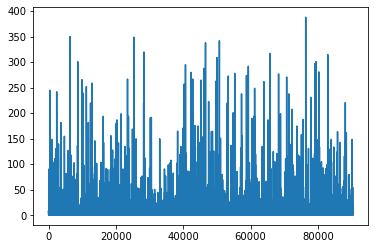

In [347]:
plt.plot(df['visitNumber'])

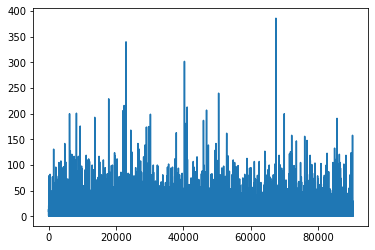

In [348]:
plt.plot(df['totals.hits'])

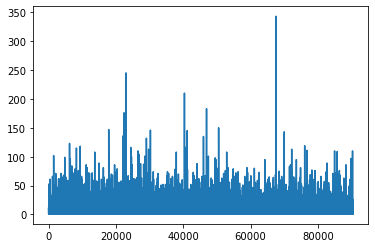

In [349]:
plt.plot(df['totals.pageviews'])

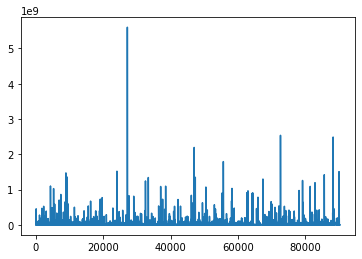

In [350]:
plt.plot(df['totals.transactionRevenue'])

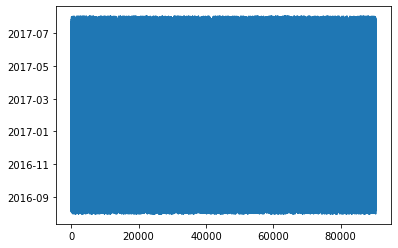

In [351]:
plt.plot(df['date'])

In [352]:
min(df['date'])

Timestamp('2016-08-01 00:00:00')

## Нормализация данных - log(x+1)
### Для использования параметров в дальнейшем необходимо, чтобы они были одного знака
#### В комментариях - другой способ нормализации, который пришлось убрать, чтобы корректно использовать эти параметры

In [354]:
df['visitNumber'] = np.log(df['visitNumber']+1)
#(df['visitNumber'] - df['visitNumber'].mean()) / df['visitNumber'].std()

In [355]:
min(df['visitNumber'])

0.6931471805599453

In [356]:
#df['totals.hits'] = (df['totals.hits'] - df['totals.hits'].mean()) / df['totals.hits'].std()
df['totals.hits'] =np.log(df['totals.hits']+1)

In [394]:
min(df['totals.hits'])

0.6931471805599453

In [357]:
#df['totals.pageviews'] = (df['totals.pageviews'] - df['totals.pageviews'].mean()) / df['totals.pageviews'].std()
df['totals.pageviews'] = np.log(df['totals.pageviews']+1)

In [358]:
#tst = (df['geoNetwork.continent'] - df['geoNetwork.continent'].mean()) / df['geoNetwork.continent'].std()
df['geoNetwork.continent'] = np.log(df['geoNetwork.continent']+1)

In [359]:
df.describe()

,channelGrouping,visitNumber,device.deviceCategory,geoNetwork.continent,totals.hits,totals.pageviews,totals.transactionRevenue
count,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,9.036500e+04
mean,0.001699,0.885055,0.501809,0.001175,1.264117,1.214053,1.667584e+06
std,0.003316,0.486373,0.847908,0.002232,0.783981,0.711154,3.591135e+07
min,0.000000,0.693147,0.000000,0.000000,0.693147,0.693147,0.000000e+00
25%,0.000640,0.693147,0.000000,0.000570,0.693147,0.693147,0.000000e+00
50%,0.000885,0.693147,0.000000,0.000570,1.098612,0.693147,0.000000e+00
75%,0.001693,0.693147,1.000000,0.000975,1.609438,1.609438,0.000000e+00
max,0.035651,5.963579,2.000000,0.014190,5.958425,5.840642,5.601400e+09


## Группировка по посетителям

In [360]:
df_clients = df.groupby(df['fullVisitorId'])

In [361]:
df_clients.first()

,channelGrouping,date,visitNumber,device.deviceCategory,geoNetwork.continent,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,...,browser.Firefox,browser.IE,browser.Edge,browser.Other,OS.Windows,OS.Mac,OS.Android,OS.IOS,OS.Linux,OS.Other
fullVisitorId,,,,,,,,,,,,,,,,,,,,,
0000010278554503158,0.000640,2016-10-20,0.693147,0,0.011865,2.484907,2.197225,False,True,0.0,...,False,False,False,False,False,True,False,False,False,False
0000174067426171406,0.000640,2016-11-11,1.098612,2,0.000570,2.079442,1.791759,False,False,0.0,...,False,False,False,False,False,False,False,True,False,False
0000436683523507380,0.002386,2017-07-25,1.098612,0,0.000570,2.197225,2.197225,False,False,0.0,...,False,False,False,False,False,True,False,False,False,False
0000568867259253661,0.000640,2016-10-18,0.693147,0,0.000570,1.609438,1.609438,False,True,0.0,...,False,False,False,False,False,True,False,False,False,False
0000639845445148063,0.001693,2016-09-12,0.693147,0,0.000570,2.197225,2.079442,False,True,0.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999636803769846518,0.002386,2017-03-29,0.693147,0,0.000962,0.693147,0.693147,True,True,0.0,...,False,False,False,False,True,False,False,False,False,False
9999773079368714197,0.000640,2017-06-11,0.693147,2,0.000570,0.693147,0.693147,True,True,0.0,...,False,False,False,False,False,False,False,True,False,False
9999887420016307570,0.000640,2016-11-25,0.693147,0,0.000570,2.079442,1.609438,False,True,0.0,...,False,False,False,False,True,False,False,False,False,False


## Определение параметров для обучения

### hits max - максимальное количество обращений (присутствует явно)

In [362]:
hits_max = df_clients.apply(
    lambda x: max(x['totals.hits']))

In [363]:
statistics.mean(hits_max)

1.267646385461517

### bounce_existence (присутствует явно) - существование отказов - наличие хотя бы одного отказа

In [364]:
bounce_existence = df_clients.apply(
    lambda x: max(x['totals.bounces']))

In [365]:
statistics.mean(bounce_existence)

0.5131371977861928

### pageViews_max (присутствует явно) - максимальное количество просмотров страниц

In [366]:
pageViews_max = df_clients.apply(
    lambda x: max(x['totals.pageviews']))

In [367]:
pageViews_max

fullVisitorId
0000010278554503158    2.197225
0000174067426171406    1.791759
0000436683523507380    2.197225
0000568867259253661    1.609438
0000639845445148063    2.079442
                         ...   
9999636803769846518    0.693147
9999773079368714197    0.693147
9999887420016307570    1.609438
9999963186378918199    0.693147
999997550040396460     0.693147
Length: 85825, dtype: float64

### device_mode (присутствует явно) - категория устройства

In [368]:
#max(set(lst), key=lst.count)
device_mode = df_clients.apply(
    lambda x: statistics.mode(x['device.deviceCategory']))

In [369]:
device_mode

fullVisitorId
0000010278554503158    0
0000174067426171406    2
0000436683523507380    0
0000568867259253661    0
0000639845445148063    0
                      ..
9999636803769846518    0
9999773079368714197    2
9999887420016307570    0
9999963186378918199    0
999997550040396460     0
Length: 85825, dtype: int64

### newVisits_min (присутствует явно) - первый раз ли посещает

In [370]:
newVisits_min = df_clients.apply(
    lambda x: min(x['totals.newVisits']))

In [371]:
newVisits_min

fullVisitorId
0000010278554503158     True
0000174067426171406    False
0000436683523507380    False
0000568867259253661     True
0000639845445148063     True
                       ...  
9999636803769846518     True
9999773079368714197     True
9999887420016307570     True
9999963186378918199     True
999997550040396460      True
Length: 85825, dtype: bool

### visitNumber_max (присутствует явно) - номер посещения

In [372]:
visitNumber_max = df_clients.apply(
    lambda x: max(x['visitNumber']))

In [373]:
statistics.mean(visitNumber_max)

0.8431475829381782

### channelGrouping_median (Неявное - преобразование было раньше) - классификация трафика - группа канала, представляющая долю вхождения транзакций в этом регионе на каждую из групп

In [374]:
channelGrouping_median = df_clients.apply(
    lambda x: statistics.median(x['channelGrouping']))

In [375]:
channelGrouping_median

fullVisitorId
0000010278554503158    0.000640
0000174067426171406    0.000640
0000436683523507380    0.002386
0000568867259253661    0.000640
0000639845445148063    0.001693
                         ...   
9999636803769846518    0.002386
9999773079368714197    0.000640
9999887420016307570    0.000640
9999963186378918199    0.000640
999997550040396460     0.000640
Length: 85825, dtype: float64

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  float64       
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  float64       
 7   totals.pageviews                              90365 non-null  float64       
 8   totals.bounces                                90365 non-null  bool

### operationSystemsMean (sum / count) [Неявное] - использованные операционки пользователем
### Предполагается, что если пользователь заходит с разных операционок, то интерес к магазину выше, а, значит, вероятность транзакций больше

In [377]:
operationSystems_mean = df_clients.apply(
    lambda x: ((max(x['OS.Windows']))+(max(x['OS.Mac']))+(max(x['OS.IOS']))+(max(x['OS.Linux']))+
        (max(x['OS.Android'])) + (max(x['OS.Other']))) / 6)

In [378]:
max(operationSystems_mean)#statistics.

0.3333333333333333

In [379]:
count = 0
for i in range(len(operationSystems_mean)):
    if operationSystems_mean[i] > 0.17:
        count += 1
print(count)

6


In [380]:
min(operationSystems_mean)

0.16666666666666666

### continents (Неявное - преобразование было раньше) - вероятность региона в осуществлении транзакции

In [381]:
continents = df_clients.apply(
    lambda x: statistics.median(x['geoNetwork.continent']))

In [382]:
continents

fullVisitorId
0000010278554503158    0.011865
0000174067426171406    0.000570
0000436683523507380    0.000570
0000568867259253661    0.000570
0000639845445148063    0.000570
                         ...   
9999636803769846518    0.000962
9999773079368714197    0.000570
9999887420016307570    0.000570
9999963186378918199    0.000975
999997550040396460     0.000570
Length: 85825, dtype: float64

### hitsPerPage (Неявное) - среднее количество обращений за страницу

In [383]:
hitsPerPage = df_clients.apply(
    lambda x: sum(x['totals.hits']) / sum(x['totals.pageviews']))

In [384]:
min(hitsPerPage)

1.0

### Client Log(Frequency) (отсутствует явно) - частота посещения в месяц

In [385]:
frequency = df_clients.apply(
    lambda x: math.log(len(x["date"]) / ((max(x['date']) - min(x["date"])) / np.timedelta64(1, 'M'))+1) if (
            ((max(x['date']) - min(x["date"]))/np.timedelta64(1, 'M') > 0)) else 0)

In [387]:
max(frequency)

4.81012939986845

### Hits per month (Неявное) - количество обращений в месяц

In [388]:
hitsPerMonth = df_clients.apply(
    lambda x: math.log(sum(x['totals.hits']) / ((max(x['date']) - min(x["date"])) / np.timedelta64(1, 'M'))+1) if (
            ((max(x['date']) - min(x["date"]))/np.timedelta64(1, 'M') > 0)) else 0)

### weekdayMode (Неявное) - наиболее встречающийся день недели для пользователя, в который он заходил в магазин

In [389]:
weekdayMode = df_clients.apply(
    lambda x: statistics.mode(x['date'].dt.dayofweek))

In [390]:
weekdayMode

fullVisitorId
0000010278554503158    3
0000174067426171406    4
0000436683523507380    1
0000568867259253661    1
0000639845445148063    0
                      ..
9999636803769846518    2
9999773079368714197    6
9999887420016307570    4
9999963186378918199    0
999997550040396460     5
Length: 85825, dtype: int64

### Y - log(sum(transaction))

In [391]:
df_Y = df_clients.apply(
    lambda x: math.log(sum(x['totals.transactionRevenue'])+1))

In [392]:
try_dataframe = pd.DataFrame(
    data={'Y': df_Y, 'HitsMax': hits_max, 'BounceExistence': bounce_existence, 
          'PageViewsMax': pageViews_max, 'DeviceMode': device_mode, 'NewVisitsMin': newVisits_min,
         'VisitNumberMax': visitNumber_max, 'ChannelGroupingMedian': channelGrouping_median,
         'OS_mean': operationSystems_mean, 'Continents': continents, 'HitsPerPage':hitsPerPage,
         'Frequency': frequency, 'HitsPerMonth': hitsPerMonth, 'WeekdayMode': weekdayMode})

In [393]:
try_dataframe.to_csv(r'ReadyForLearning.csv')

# Обучение моделей

## Получение X и Y из таблицы

In [2]:
df_input = pd.read_csv('ReadyForLearning.csv', dtype={'fullVisitorId': 'str'})

In [3]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85825 entries, 0 to 85824
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fullVisitorId          85825 non-null  object 
 1   Y                      85825 non-null  float64
 2   HitsMax                85825 non-null  float64
 3   BounceExistence        85825 non-null  bool   
 4   PageViewsMax           85825 non-null  float64
 5   DeviceMode             85825 non-null  int64  
 6   NewVisitsMin           85825 non-null  bool   
 7   VisitNumberMax         85825 non-null  float64
 8   ChannelGroupingMedian  85825 non-null  float64
 9   OS_mean                85825 non-null  float64
 10  Continents             85825 non-null  float64
 11  HitsPerPage            85825 non-null  float64
 12  Frequency              85825 non-null  float64
 13  HitsPerMonth           85825 non-null  float64
 14  WeekdayMode            85825 non-null  int64  
dtypes:

In [4]:
df_input = df_input.set_index('fullVisitorId')

In [5]:
Y_table = df_input.Y

In [6]:
Y_table

fullVisitorId
0000010278554503158    0.0
0000174067426171406    0.0
0000436683523507380    0.0
0000568867259253661    0.0
0000639845445148063    0.0
                      ... 
9999636803769846518    0.0
9999773079368714197    0.0
9999887420016307570    0.0
9999963186378918199    0.0
999997550040396460     0.0
Name: Y, Length: 85825, dtype: float64

In [7]:
df_input.drop('Y', 1, inplace=True)

In [8]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85825 entries, 0000010278554503158 to 999997550040396460
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HitsMax                85825 non-null  float64
 1   BounceExistence        85825 non-null  bool   
 2   PageViewsMax           85825 non-null  float64
 3   DeviceMode             85825 non-null  int64  
 4   NewVisitsMin           85825 non-null  bool   
 5   VisitNumberMax         85825 non-null  float64
 6   ChannelGroupingMedian  85825 non-null  float64
 7   OS_mean                85825 non-null  float64
 8   Continents             85825 non-null  float64
 9   HitsPerPage            85825 non-null  float64
 10  Frequency              85825 non-null  float64
 11  HitsPerMonth           85825 non-null  float64
 12  WeekdayMode            85825 non-null  int64  
dtypes: bool(2), float64(9), int64(2)
memory usage: 10.5+ MB


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df_input, Y_table, test_size=0.2, random_state=26)

### Обучение GBM

#### Проверка влияния Impurity - оказалась крайне незначительной

In [660]:
def CheckImpurity(X_train, X_test, y_train, y_test):
    min_impurity_parameter_values = [0.01, 0.11, 0.12, 0.13, 0.14, 0.145, 0.015, 0.155, 0.16, 0.165, 0.17, 0.02]
    for min_impurity_decrease_parameter in min_impurity_parameter_values:
        GBM = ensemble.GradientBoostingRegressor(n_estimators=210, min_samples_leaf=15, max_depth=5,
                                            max_features='sqrt', subsample=0.85, min_samples_split=300, random_state=14,
                                                min_impurity_decrease=min_impurity_decrease_parameter)
        GBM.fit(X_train, y_train)
        print(str(min_impurity_decrease_parameter)+" : "+str(GBM.score(X_test, y_test)))

In [661]:
CheckImpurity(X_train, X_test, y_train, y_test)

0.01 : 0.3196772289545958
0.11 : 0.31745538149772357
0.12 : 0.3156371577179996
0.13 : 0.31400467116938924
0.14 : 0.31527571596522963
0.145 : 0.31527571596522963
0.015 : 0.3210923239483021
0.155 : 0.3139408080181534
0.16 : 0.3139408080181534
0.165 : 0.3139408080181534
0.17 : 0.3139408080181534
0.02 : 0.3175282329765522


### Обучение и получение score за одну попытку:
#### Параметры подбирались вручную исходя из вычислительных возможностей и рекомендаций к обучению GBM:
#### https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [36]:
GBM = ensemble.GradientBoostingRegressor(n_estimators=210, min_samples_leaf=15, max_depth=5,
                                        max_features='sqrt', subsample=0.85, min_samples_split=300 #random_state=14
                                        )

In [37]:
GBM.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=300,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
GBM.score(X_test, y_test)

0.3126097150376006

### Обучение RandomForest

#### Поиск параметров через RandomizedSearchCV

In [17]:
from sklearn.model_selection import RandomizedSearchCV
# count of trees in random forest
n_estimators = [100, 150, 200, 400, 600, 800, 1000, 1200, 1400, 1600]#, 1000, 1200, 1400, 1600, 1800, 2000
# count of features for splitting
max_features = ['auto', 'sqrt', 'log2']
# max number of levels in tree
max_depth = [3, 5, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, None]#, 40, 50, 60, 70, 80, 90, 100
# min of samples for splitting
min_samples_split = [2, 5, 10, 15, 20, 25, 40, 60, 80, 150, 200, 250, 300, 350]
# min of samples for a leaf
min_samples_leaf = [1, 2, 3, 5, 7, 10, 15, 20, 25, 40, 50, 60, 100]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Loss criteria
#criterion = ['mse', 'mae']
# columns
#max_features = ['auto', 'sqrt', 'log2']

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}#, 'criterion': criterion, 'max_features': max_features

rf = ensemble.RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, 
                               n_iter = 40, cv = 2, verbose=2, random_state=30)
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True, total=   8.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True, total=   8.8s
[CV] n_estimators=600, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=9, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=9, bootstrap=False, total=  19.9s
[CV] n_estimators=600, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=9, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=9, bootstrap=False, total=  23.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.3s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=1

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 18.6min finished


{'n_estimators': 1000, 'min_samples_split': 60, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


#### Проверка работы на одной попытке

In [14]:
RandomForest = ensemble.RandomForestRegressor(n_estimators=800, min_samples_split=80,
                                              max_depth=None, max_features="log2",random_state=30,
                                             min_samples_leaf=10, bootstrap=False)

In [21]:
RandomForest = ensemble.RandomForestRegressor(n_estimators=1000, min_samples_split=60,
                                              max_depth=30, max_features="sqrt",random_state=30,
                                             min_samples_leaf=3, bootstrap=True)

In [22]:
RandomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=60, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [23]:
RandomForest.score(X_test, y_test)

0.31047899786398414

### Обучение линейной регрессии
#### В sklearn отсутствует возможность задачи гиперпараметров кроме нормализации

In [30]:
LinRegression = LinearRegression(normalize=False)

In [31]:
LinRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
LinRegression.score(X_test, y_test)

0.1333814218852556

### Обучение SVR

In [38]:
test2d = y_train.values.reshape(1,-1)

In [39]:
test2d

array([[0., 0., 0., ..., 0., 0., 0.]])

In [11]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_svr_train = sc_X.fit_transform(X_train)
Y_svr_train = sc_y.fit_transform(y_train.values.reshape(1,-1)).reshape(-1, 1)#.values()
X_svr_test = sc_X.fit_transform(X_test)
Y_svr_test = sc_y.fit_transform(y_test.values.reshape(1,-1)).reshape(-1, 1)#.values()

In [76]:
svr = SVR(C=12.0, epsilon=0.2, kernel="poly", max_iter=50000)

In [77]:
svr.fit(X_train, y_train) #NORMALIZE!!! 

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVR(C=12.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='poly', max_iter=50000, shrinking=True, tol=0.001, verbose=False)

In [78]:
svr.score(X_test, y_test)

0.009756357873817234

In [19]:
"""svm_reg = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svr", LinearSVR(C=1000, epsilon=0.2, max_iter=10000)),#, epsilon=0.2
 ])
svm_reg.fit(X_train, y_train)"""
#l_svr = LinearSVR(C=1000.0, epsilon=0.2, max_iter=10000)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svr',
                 LinearSVR(C=1000, dual=True, epsilon=0.2, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=10000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [79]:
l_svr = LinearSVR(C=1000, epsilon=0.2, max_iter=10000)
l_svr.fit(X_train, y_train)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(C=1000, dual=True, epsilon=0.2, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0)

In [80]:
l_svr.score(X_test, y_test)

0.015070312525564011

### Вычисление медианы

In [81]:
crossval = ShuffleSplit(n_splits=5, test_size=0.2, random_state=13)
GBM_score = statistics.median(cross_val_score(GBM,  df_input, Y_table, cv=crossval))

In [82]:
RF_score = statistics.median(cross_val_score(RandomForest, df_input, Y_table, cv=crossval))

In [83]:
LR_score = statistics.median(cross_val_score(LinRegression, df_input, Y_table, cv=crossval))

In [84]:
l_svr_score = statistics.median(cross_val_score(l_svr,  df_input, Y_table, cv=crossval))

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWa

In [85]:
svr_score = statistics.median(cross_val_score(svr,  df_input, Y_table, cv=crossval))

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your dat

In [87]:
print("GBM_avg : " + str(GBM_score))
print("RF_avg : " + str(RF_score))
print("LR_avg : " + str(LR_score))
print("l_svr_avg : " + str(l_svr_score))
print("svr_avg : " + str(svr_score))

GBM_avg : 0.3123986799332046
RF_avg : 0.31717568862830103
LR_avg : 0.14483544081299093
l_svr_avg : 0.018001388557613685
svr_avg : 0.004720742560960223


## Выполнение 20 разбиений и построение boxPlot

### Построение для GBM

In [89]:
crossval_next = ShuffleSplit(n_splits=20, test_size=0.2, random_state=13)
GBM_results = cross_val_score(GBM,  df_input, Y_table, cv=crossval_next)

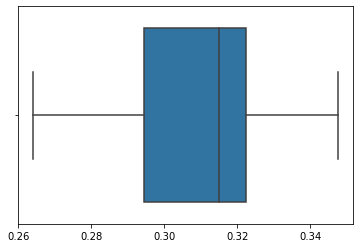

In [92]:
gbm_boxplot = sns.boxplot(x=GBM_results)

### Построение для Random Forest

In [93]:
RF_results = cross_val_score(RandomForest, df_input, Y_table, cv=crossval_next)

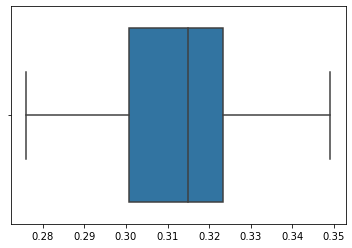

In [94]:
rf_boxplot = sns.boxplot(x=RF_results)

### Построение для Linear Regression

In [95]:
LR_results = cross_val_score(LinRegression, df_input, Y_table, cv=crossval_next)

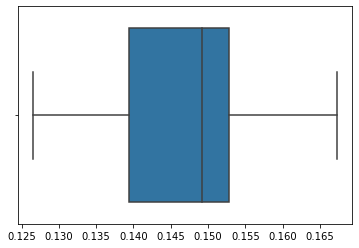

In [96]:
lr_boxplot = sns.boxplot(x=LR_results)

### Построение для SVR

In [ ]:
SVR_results = cross_val_score(l_svr_avg, df_input, Y_table, cv=crossval_next)

In [ ]:
svr_boxplot = sns.boxplot(x=SVR_results)